In [2]:
#Initialize, import, and format
import numpy as np
import pandas as pd
from numpy.random import normal, multivariate_normal

import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.decomposition import PCA
from scipy import stats


DATA_DIRECTORY = "C:\\Users\\WDAmo\\GitHub\\font_analysis\\data"
PARAM_LABELS = ["unit", "pen", "cap", "bar", "asc", "desc", "xht", "horz",
                "vert", "cont", "supr", "slnt", "aprt", "crnr", "over", "tapr"]

def extract_data(lin, chain):
    raw_file = pd.read_csv(DATA_DIRECTORY + "\\" + str(lin) + "\\" + str(chain) + ".csv")["chosen.values"]
    df = pd.DataFrame([x[1:-1].split(',') for x in raw_file])
    return df
def extract_all():
    out = []
    for i in range(4): ##For each lineage,
        lin = []
        for j in range(4): ##And each chain inside that lineage
            lin.append(extract_data(i,j))
        out.append(lin)
    return out;
def split_df(df):
    if len(df) % 2 != 0:  # Handling `df` with `odd` number of rows
        df = df.iloc[:-1, :]
    df1, df2 =  np.array_split(df, 2)
    return df1, df2
def split_all(dfs): # Returns the second half of each dataframe, cast correctly
    out = []
    for i in range(4): ##For each lineage,
        lin = []
        for j in range(4): ##And each chain inside that lineage
            upper, lower = split_df(dfs[i][j])
            lin.append(lower.astype('float64').to_numpy())
        out.append(lin)
    return out;
def combine_all(chains):
    full_chain = np.empty((0,16), 'float64')
    for i in range(4):
        for j in range(4):
            full_chain = np.concatenate((full_chain, chains[i][j]))
    return full_chain
def combine_by_font(chains):
    arial = np.empty((0,16), 'float64')
    georgia = np.empty((0,16), 'float64')
    for i in range(4):
        if(i%2==1):
            for j in range(4):
                arial = np.concatenate((arial, chains[i][j]))
        else:            
            for j in range(4):
                georgia = np.concatenate((georgia, chains[i][j]))
    return arial, georgia
def add_noise(dfs, sigma):
    out = []
    noise = np.random.normal(0, sigma, dfs.shape)  
    return (dfs + noise)

raw_data = split_all(extract_all())
dataset = add_noise(combine_all(raw_data), 1)
arial, georgia = combine_by_font(raw_data)

In [3]:
np.mean(georgia)

48.89821421124712

In [4]:
for p in range(16):
    subset = georgia[:,p]
    print(PARAM_LABELS[p] + ": " + str(np.std(dataset[:, p])))


unit: 25.456294935720926
pen: 26.252355105213358
cap: 28.140955683147467
bar: 27.896927454053667
asc: 27.96014769654072
desc: 28.655070538412698
xht: 28.253163560292258
horz: 28.5452984586918
vert: 28.08354206252072
cont: 29.543804526925783
supr: 27.744872312195955
slnt: 24.56409459690098
aprt: 28.014989611341196
crnr: 27.833915212710462
over: 26.55942136326258
tapr: 28.574305803202698


In [8]:
# PCA
X = dataset
pca = PCA(n_components=.99, svd_solver='full')
pca.fit(X)
print(pca.explained_variance_)

[1334.76041048 1149.49512262 1035.18903186  915.31719221  877.28266652
  841.46582551  823.08761666  741.42883665  698.22641915  664.89352097
  658.44576348  610.20345473  530.71366942  507.17967398  457.29315925
  394.84223593]


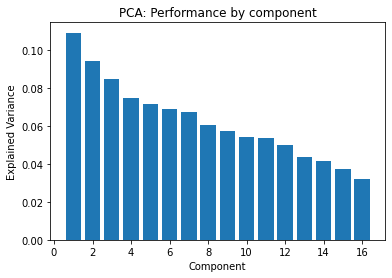

In [14]:
fig, ax = plt.subplots()
x = range(1,17)
ax.bar(x, pca.explained_variance_ratio_)
ax.set_title("PCA: Performance by component")
ax.set_ylabel("Explained Variance")
ax.set_xlabel("Component")
plt.savefig("PCA.pdf")

In [9]:
def add_noise(dfs, sigma):
    out = []
    noise = np.random.normal(0, sigma, dfs.shape)  
    return (dfs + noise)
arial_noisy = add_noise(arial, 10)
georgia_noisy = add_noise(georgia, 10)

In [10]:
for p in range(16):
    ts, ps = stats.ttest_ind([:,p],georgia_noisy[:,p], alternative="two-sided")
    print(PARAM_LABELS[p] + ": " + str(ps))

SyntaxError: invalid syntax (<ipython-input-10-b645032b53fd>, line 2)

In [17]:
ts, ps = stats.ttest_ind(arial,georgia, alternative="two-sided")
for p in range(16):
    print(PARAM_LABELS[p] + ": " + str(ps[p]))

unit: 7.91374868387609e-13
pen: 0.0
cap: 0.00011791116316203
bar: 1.3874997201746926e-31
asc: 9.739080257599795e-31
desc: 4.16217913734221e-59
xht: 2.11218073081952e-93
horz: 4.7279547874979e-116
vert: 3.2124700914551393e-113
cont: 0.4743683084344775
supr: 3.394063132386736e-23
slnt: 6.946153540973465e-19
aprt: 9.06867769174962e-140
crnr: 1.9935233158137574e-35
over: 6.081266547798221e-81
tapr: 1.8415223037692279e-28


In [37]:
def combine_lin(chains):
    out = []
    for i in range(4):
        full_chain = np.empty((0,16), 'float64')
        for j in range(4):
            full_chain = np.concatenate((full_chain, chains[i][j]))
        out.append(full_chain)
    return out
lins = combine_lin(raw_data)

In [41]:
ts, ps = stats.ttest_ind(raw_data[0][2],raw_data[0][0], alternative="two-sided")
for p in range(16):
    print(PARAM_LABELS[p] + ": " + str(ps[p]))

unit: 4.304546408955523e-22
pen: 1.1573891133248189e-10
cap: 1.0920685272966413e-12
bar: 1.3007579481789065e-07
asc: 4.58139612214972e-111
desc: 0.00034643545121543646
xht: 4.800029839293324e-06
horz: 3.166590084381656e-154
vert: 9.69878493421719e-13
cont: 4.548770668018369e-116
supr: 2.5055125685523674e-21
slnt: 9.909879180793205e-11
aprt: 1.2765926529630187e-12
crnr: 2.2816433263747953e-06
over: 0.23160991627412425
tapr: 2.5754998096976693e-228
